In [1]:
import pandas as pd
import numpy as np


### Đọc dữ liệu

In [2]:
data = pd.read_csv('./df_result.csv')
data 

,Title,Code,Date,Price per m²,Total Price,Area,Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719,11/01/2025,"~197,37 triệu/m²","7,5 tỷ",38 m²,3 phòng,4 phòng,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406,05/01/2025,"~42,92 triệu/m²",3 tỷ,"69,9 m²",2 phòng,2 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798,06/01/2025,"~55,26 triệu/m²","8,4 tỷ",152 m²,3 phòng,2 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996,03/01/2025,~240 triệu/m²,12 tỷ,50 m²,4 phòng,4 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182,04/01/2025,"~203,85 triệu/m²","26,5 tỷ",130 m²,6 phòng,6 phòng,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325,09/01/2025,NAN,Thỏa thuận,80 m²,NAN,NAN,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325,08/01/2025,"~311,11 triệu/m²",14 tỷ,45 m²,NAN,NAN,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686,09/01/2025,NAN,Thỏa thuận,45 m²,1 phòng,1 phòng,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537,06/01/2025,"~77,39 triệu/m²","6,8 tỷ","87,87 m²",3 phòng,2 phòng,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


In [3]:
data.shape

(12948, 11)

##### Kiểm tra xem có bị đảo lộn vị trí ở 2 cột Total Price và Price per m²

In [6]:
#Kiểm tra xem dòng nào có giá trị Total Price chứa tiền "Triệu"
dfErrorColumn = data[data['Total Price'].str.contains('triệu', na=False)] # Add na=False to handle NaN values
dfErrorColumn

,Title,Code,Date,Price per m²,Total Price,Area,Bedroom Number,Bathroom Number,Legal Status,Furniture,District
8,"Cần bán gấp 3 căn hộ 107m2 126m, 160m view cực...",39079017,07/01/2025,"~9,6 tỷ",60 triệu/m²,160 m²,4 phòng,2 phòng,Sổ đỏ/ Sổ hồng.,Đầy đủ,Nam Từ Liêm
10,"Hạ mạnh giá, bán nhà số 8 dãy 16B3 đường to 17...",40951901,10/01/2025,"~36,75 tỷ",245 triệu/m²,150 m²,4 phòng,4 phòng,Sổ đỏ/ Sổ hồng,NAN,Hà Đông
11,Hàng hiếm chung cư HN giá siêu rẻ căn 2PN Giá ...,41910633,11/01/2025,NAN,17 triệu/m²,65 m²,2 phòng,2 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ.,Long Biên
38,"Bảng giá mới nhất dự án Jade Lake Residence, d...",40964547,10/01/2025,NAN,290 triệu/m²,102 m²,NAN,NAN,Sổ đỏ/ Sổ hồng,NAN,Bắc Từ Liêm
65,"Cần bán mảnh đất thôn Lộc Hà, xã Mai Lâm. DT 5...",42022193,10/01/2025,"~4,1 tỷ",76 triệu/m²,54 m²,NAN,NAN,Sổ đỏ/ Sổ hồng,NAN,Đông Anh
...,...,...,...,...,...,...,...,...,...,...,...
12872,Đất chờ chủ mới về xây nhà vườn cực xinh 1030m...,41950314,10/01/2025,"~7,21 tỷ",7 triệu/m²,1.030 m²,NAN,NAN,Sổ đỏ/ Sổ hồng,NAN,Sóc Sơn
12877,"Bán đất DT 80m2 Lô góc, mặt đường 12m, vỉa hè ...",40837360,10/01/2025,"~25,62 tỷ",280 triệu/m²,"91,5 m²",NAN,NAN,Sổ đỏ/ Sổ hồng.,NAN,Long Biên
12888,Bán 80m2 đất X1 Đông Hội - quy hoạch phân lô,41045153,12/01/2025,"~10,4 tỷ",130 triệu/m²,80 m²,NAN,NAN,Sổ đỏ/ Sổ hồng,NAN,Đông Anh
12891,"Mở bán đất đẹp ở Phan Xá, Xã Uy Nỗ, Huyện Đông...",41834556,10/01/2025,"~6,58 tỷ",92 triệu/m²,"71,5 m²",NAN,NAN,Sổ đỏ/ Sổ hồng,NAN,Đông Anh


##### Nhận xét: 
    - Có 945 dòng bị nhầm lẫn thông tin giữa 2 cột Price per m2 và Total Price
#### Cách khắc phục:
    - Đổi chỗ 2 giá trị này trong các dòng bị lỗi

In [13]:
#Xác định các dòng trong cột Price per m² có chứa từ tỷ.
mask = data['Price per m²'].str.contains('tỷ', na=False)
#Lưu tạm các giá trị ban đầu trong cột Total Price của các dòng bị lỗi.
temp = data.loc[mask, 'Total Price'].copy()
#Chuyển giá trị từ cột Price per m² sang cột Total Price sau khi loại bỏ từ 'tỷ'
data.loc[mask, 'Total Price'] = data.loc[mask, 'Price per m²'].str.replace(' tỷ', '')
data.loc[mask, 'Price per m²'] = temp.str.replace(' triệu/m²', '')

In [14]:
#Xác định các dòng trong cột Total Price có chứa từ triệu.
mask1 = data['Total Price'].str.contains('triệu', na=False)
#Lưu tạm các giá trị ban đầu trong cột Total Price của các dòng bị lỗi.
temp = data.loc[mask1, 'Total Price'].copy()
data.loc[mask1, 'Total Price'] = data.loc[mask1, 'Price per m²'].str.replace(' tỷ', '')
data.loc[mask1, 'Price per m²'] = temp.str.replace(' triệu/m²', '')

In [15]:
dfErrorColumn = data[data['Total Price'].str.contains('triệu', na=False)] # Add na=False to handle NaN values
dfErrorColumn

,Title,Code,Date,Price per m²,Total Price,Area,Bedroom Number,Bathroom Number,Legal Status,Furniture,District


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948 entries, 0 to 12947
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            12948 non-null  object
 1   Code             12948 non-null  object
 2   Date             12948 non-null  object
 3   Price per m²     12948 non-null  object
 4   Total Price      12948 non-null  object
 5   Area             12948 non-null  object
 6   Bedroom Number   12948 non-null  object
 7   Bathroom Number  12948 non-null  object
 8   Legal Status     12948 non-null  object
 9   Furniture        12948 non-null  object
 10  District         12948 non-null  object
dtypes: object(11)
memory usage: 1.1+ MB


In [17]:
data.columns

Index(['Title', 'Code', 'Date', 'Price per m²', 'Total Price', 'Area',
       'Bedroom Number', 'Bathroom Number', 'Legal Status', 'Furniture',
       'District'],
      dtype='object')

## Nhận xét:
    - Dữ liệu gồm 12948 dòng và 11 thuộc tính
    - Dữ liệu xuất hiện giá trị NAN không thoả mãn
    - Định dạng kiểu dữ liệu tại các cột code, date, price per m2, total price, area, bedroom number, bathroom number chưa hợp lý
    - Sau khi kiểm tra phát hiện dữ liệu bị trùng lặp và chưa hợp lý tại 2 cột Price per m2 và Total Price
##### Giải pháp:
    - Thay thế giá trị NAN thành giá trị 0
    - Định dạng lại kiểu dữ liệu của các cột code,  bedroom number, bathroom number thành kiểu int, các cột price per m2, total price thành kiểu float và cột date thành kiểu date/time

#### Đổi kiểu dữ liệu cho các cột

In [18]:
data['Price per m²'] = data['Price per m²'].str.replace(',', '.', regex=False)  # Đổi dấu phẩy thành dấu chấm
data['Price per m²'] = data['Price per m²'].str.replace('[^\d.]', '', regex=True)  # Chỉ giữ số và dấu chấm
data['Price per m²'] = pd.to_numeric(data['Price per m²'], errors='coerce')  # Chuyển đổi sang kiểu số

In [19]:
data['Total Price'] = data['Total Price'].str.replace(',', '.', regex=False)  
data['Total Price'] = data['Total Price'].str.replace('[^\d.]', '', regex=True)  
data['Total Price'] = pd.to_numeric(data['Total Price'], errors='coerce')

In [20]:
data['Area'] = data['Area'].str.replace(',', '.', regex=False)  
data['Area'] = data['Area'].str.replace('[^\d.]', '', regex=True)  
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

In [21]:
data['Bedroom Number'] = data['Bedroom Number'].str.replace(',', '.', regex=False)  
data['Bedroom Number'] = data['Bedroom Number'].str.replace('[^\d.]', '', regex=True)  
data['Bedroom Number'] = pd.to_numeric(data['Bedroom Number'], errors='coerce')

In [22]:
data['Bathroom Number'] = data['Bathroom Number'].str.replace(',', '.', regex=False)  
data['Bathroom Number'] = data['Bathroom Number'].str.replace('[^\d.]', '', regex=True)  
data['Bathroom Number'] = pd.to_numeric(data['Bathroom Number'], errors='coerce')

In [23]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [24]:
data['Code'] = pd.to_numeric(data['Code'], errors='coerce')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948 entries, 0 to 12947
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            12948 non-null  object        
 1   Code             12944 non-null  float64       
 2   Date             12947 non-null  datetime64[ns]
 3   Price per m²     10966 non-null  float64       
 4   Total Price      11280 non-null  float64       
 5   Area             12937 non-null  float64       
 6   Bedroom Number   8622 non-null   float64       
 7   Bathroom Number  7953 non-null   float64       
 8   Legal Status     12948 non-null  object        
 9   Furniture        12948 non-null  object        
 10  District         12948 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.1+ MB


#### Đổi tên cho cột để phù hợp với kiểu dữ liệu mới

In [26]:

data = data.rename(columns={"Price per m²": "Price per m² (triệu/m²)", "Total Price": "Total Price (tỷ)", "Area":"Area (m²)"})
data

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01,NaN,NaN,80.00,NaN,NaN,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01,311.11,14.0,45.00,NaN,NaN,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01,NaN,NaN,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


In [27]:
data.describe()

,Code,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number
count,1.294400e+04,10966.000000,11280.000000,12937.000000,8622.000000,7953.000000
mean,4.108208e+07,181.603052,19.461741,97.949981,4.228369,3.879039
std,2.187230e+06,148.696617,41.364988,89.427997,4.457813,4.282346
min,1.219336e+07,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.118225e+07,68.000000,5.000000,50.000000,2.000000,2.000000
50%,4.183404e+07,153.330000,8.400000,74.000000,3.000000,3.000000
75%,4.200526e+07,244.037500,18.000000,110.000000,4.000000,4.000000
max,4.203220e+07,991.000000,955.000000,989.000000,105.000000,105.000000


#### Kiểm tra giá trị bị thiếu

In [28]:
data.isnull().sum()

Title                         0
Code                          4
Date                          1
Price per m² (triệu/m²)    1982
Total Price (tỷ)           1668
Area (m²)                    11
Bedroom Number             4326
Bathroom Number            4995
Legal Status                  0
Furniture                     0
District                      0
dtype: int64

##### Nhận xét: 
    - Cột Code thiếu 4 giá trị
    - Cột Date thiếu 1 giá trị
    - Cột Price per m2 thiếu 1403 giá trị (có thể bài đăng không có Total Price nên cũng không có Price per m2)
    - Cột Total Price (tỷ) thiếu 1402 giá trị (do là giá thoả thuận)
    - Cột Area thiếu 11 giá trị
    - Cột Bedroom Number thiếu 4326 giá trị
    - Cột Bathroom Number thiếu 4995 giá trị
    (Do người đăng bài không cập nhật thông tin số phòng ngủ và phòng tắm)
##### Giải pháp:
    - Xoá các dòng bị thiếu giá trị Code và Date do mỗi bài đăng có mã Code riêng
    - Thay thế các giá trị bị thiếu bằng giá trị 0 

In [29]:
data = data.fillna(0)
data

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01 00:00:00,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01 00:00:00,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01 00:00:00,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01 00:00:00,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01 00:00:00,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01 00:00:00,0.00,0.0,80.00,0.0,0.0,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01 00:00:00,311.11,14.0,45.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01 00:00:00,0.00,0.0,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01 00:00:00,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


In [30]:
data = data.drop(data[data['Code'] == 0].index)
data

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01 00:00:00,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01 00:00:00,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01 00:00:00,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01 00:00:00,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01 00:00:00,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01 00:00:00,0.00,0.0,80.00,0.0,0.0,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01 00:00:00,311.11,14.0,45.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01 00:00:00,0.00,0.0,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01 00:00:00,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


In [31]:
data.isnull().sum()

Title                      0
Code                       0
Date                       0
Price per m² (triệu/m²)    0
Total Price (tỷ)           0
Area (m²)                  0
Bedroom Number             0
Bathroom Number            0
Legal Status               0
Furniture                  0
District                   0
dtype: int64

#### Kiểm tra dòng thông tin nào không thuộc địa phận Hà Nội

In [33]:
#Danh sách các quận, huyện, thị xã tại Hà nội
HaNoi = [
    "Ba Đình", "Cầu Giấy", "Đống Đa", "Hai Bà Trưng", "Hoàn Kiếm", "Thanh Xuân", 
    "Hoàng Mai", "Long Biên", "Hà Đông", "Tây Hồ", "Nam Từ Liêm", "Bắc Từ Liêm", 
    "Thanh Trì", "Ba Vì", "Đan Phượng", "Gia Lâm", "Đông Anh", "Thường Tín", 
    "Thanh Oai", "Chương Mỹ", "Hoài Đức", "Mỹ Đức", "Phúc Thọ", "Thạch Thất", 
    "Quốc Oai", "Phú Xuyên", "Ứng Hòa", "Mê Linh", "Sóc Sơn", "Sơn Tây"
]

#Tìm ra những dòng thông tin không thuộc địa phận Hà Nội
Not_HaNoi = data[~data['District'].isin(HaNoi)]
Not_HaNoi


,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
8090,Chỉ hơn 400 triệu căn 1PN - nhà ở xã hội Everg...,41995918.0,2025-06-01 00:00:00,460.0,17.44,26.38,1.0,1.0,Sổ đỏ/ Sổ hồng,Không nội thất,An Dương
12669,Bán lô đất biển 2 mặt tiền đường Hoàng Sa đối ...,39084483.0,2025-09-01 00:00:00,0.0,0.00,500.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Điện Bàn


##### Nhận xét:
    - xuất hiện 2 dòng thông tin về dự án không thuộc địa phận Hà Nội tại dòng 8090 và 12669
##### Giải pháp:
    - Xoá bỏ 2 dòng thông tin không thoả mãn

In [35]:
data = data.drop([8090, 12669])
data

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01 00:00:00,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01 00:00:00,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01 00:00:00,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01 00:00:00,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01 00:00:00,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01 00:00:00,0.00,0.0,80.00,0.0,0.0,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01 00:00:00,311.11,14.0,45.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01 00:00:00,0.00,0.0,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01 00:00:00,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


#### Kiểm tra giá trị trùng lặp

In [36]:
data.duplicated().sum()

530

##### Nhận xét:
    - Xuất hiện 530 dòng bị trùng lặp thông tin
##### Giải pháp:
    - Xoá bỏ các dòng thông tin bị lặp 

In [37]:
data.drop_duplicates(inplace=True)
data

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01 00:00:00,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01 00:00:00,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01 00:00:00,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01 00:00:00,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01 00:00:00,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01 00:00:00,0.00,0.0,80.00,0.0,0.0,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01 00:00:00,311.11,14.0,45.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01 00:00:00,0.00,0.0,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01 00:00:00,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


In [38]:
data.duplicated().sum()

0

In [40]:
# Kiểm tra lại tất cả các dòng trùng lặp (dựa trên tất cả các cột)
duplicatess = data[data.duplicated(keep=False)]
duplicatess 

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District


#### Kiểm tra trùng lặp tại cột "Code"

In [39]:
duplicates = data[data.duplicated(subset=['Code'])]
duplicates

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District


In [41]:
data.describe()

,Code,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number
count,1.241200e+04,12412.000000,12412.000000,12412.000000,12412.000000,12412.000000
mean,4.108149e+07,153.799025,16.887087,97.657462,2.822510,2.390348
std,2.185872e+06,151.847714,38.475966,89.094906,4.180964,3.873366
min,1.219336e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.117845e+07,50.482500,3.700000,49.450000,0.000000,0.000000
50%,4.183466e+07,110.000000,7.050000,74.000000,2.000000,2.000000
75%,4.200522e+07,222.220000,16.000000,110.000000,4.000000,4.000000
max,4.203220e+07,991.000000,955.000000,989.000000,105.000000,105.000000


#### Nhận xét:
    - Giá trị max của Bedroom Number và Bathroom Num có giá trị max là 105 cần được kiểm tra lại

<AxesSubplot:>

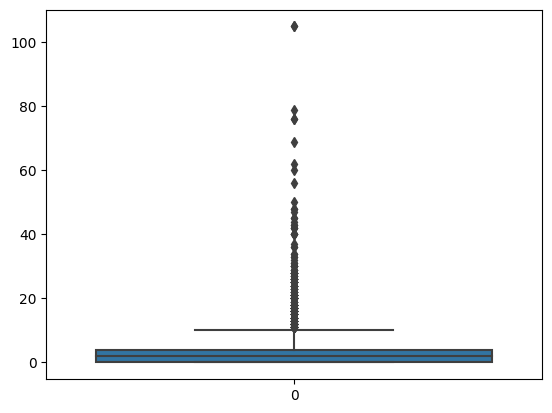

In [42]:

# Tạo boxplot để kiểm tra outliers cho Bedroom Number
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['Bedroom Number'])


In [43]:
# loại bỏ ngoại lai giá trị Bedroom number
Q1 = data['Bedroom Number'].quantile(0.25)
Q3 = data['Bedroom Number'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Bedroom Number'] >= lower_bound) & (data['Bedroom Number'] <= upper_bound)]
data

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01 00:00:00,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01 00:00:00,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01 00:00:00,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01 00:00:00,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01 00:00:00,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01 00:00:00,0.00,0.0,80.00,0.0,0.0,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01 00:00:00,311.11,14.0,45.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01 00:00:00,0.00,0.0,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01 00:00:00,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


<AxesSubplot:>

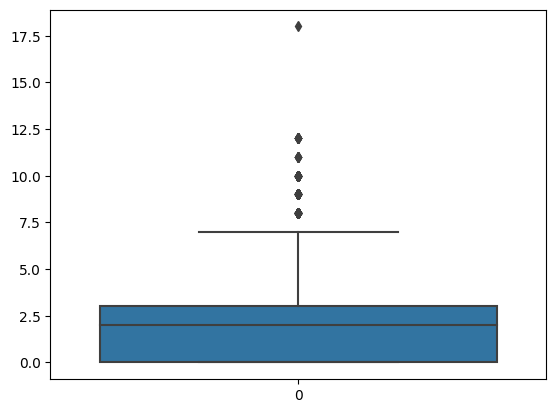

In [44]:
# Tạo boxplot để kiểm tra outliers cho Bathroom Number
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['Bathroom Number'])

In [46]:
# loại bỏ ngoại lai giá trị Bedroom number
Q1 = data['Bathroom Number'].quantile(0.25)
Q3 = data['Bathroom Number'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Bathroom Number'] >= lower_bound) & (data['Bathroom Number'] <= upper_bound)]
data

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01 00:00:00,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01 00:00:00,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01 00:00:00,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01 00:00:00,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01 00:00:00,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01 00:00:00,0.00,0.0,80.00,0.0,0.0,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01 00:00:00,311.11,14.0,45.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01 00:00:00,0.00,0.0,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01 00:00:00,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


In [47]:
df = pd.DataFrame(data)

In [48]:
df

,Title,Code,Date,Price per m² (triệu/m²),Total Price (tỷ),Area (m²),Bedroom Number,Bathroom Number,Legal Status,Furniture,District
0,"Bán nhà Ngõ Tân Lạc. Lô Góc - Xây mới, thông s...",42029719.0,2025-11-01 00:00:00,197.37,7.5,38.00,3.0,4.0,Sổ đỏ/ Sổ hồng,NAN,Hai Bà Trưng
1,"Chính chủ cần tiền bán gấp căn 69,9m giá giảm ...",41906406.0,2025-05-01 00:00:00,42.92,3.0,69.90,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hoài Đức
2,Chính chủ gửi bán căn hộ tầng trung 152m2 giá ...,41489798.0,2025-06-01 00:00:00,55.26,8.4,152.00,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Nam Từ Liêm
3,"Bán nhà 50m2, 5 tầng, 12 tỷ, DV Dọc Bún La Khê...",41981996.0,2025-03-01 00:00:00,240.00,12.0,50.00,4.0,4.0,Sổ đỏ/ Sổ hồng,Đầy đủ,Hà Đông
4,Bán nhà 5 tầng diện tích 130m2 mặt tiền 10m mặ...,40616182.0,2025-04-01 00:00:00,203.85,26.5,130.00,6.0,6.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
...,...,...,...,...,...,...,...,...,...,...,...
12943,80m2 đất dịch vụ Tây Tựu cần bán gấp - hồ sơ đ...,40491325.0,2025-09-01 00:00:00,0.00,0.0,80.00,0.0,0.0,Ủy quyền,NAN,Bắc Từ Liêm
12944,"Bán nhà riêng phố Từ Hoa, Tây Hồ 45m2, MT 4m, ...",41839325.0,2025-08-01 00:00:00,311.11,14.0,45.00,0.0,0.0,Sổ đỏ/ Sổ hồng,NAN,Tây Hồ
12945,Bán gấp căn hộ chung cư cao cấp Lancaster 20 N...,41543686.0,2025-09-01 00:00:00,0.00,0.0,45.00,1.0,1.0,Sổ đỏ,Đầy đủ nội thất.,Ba Đình
12946,"Chính chủ bán gấp trong tuần CH 3PN - 2WC, DT ...",41496537.0,2025-06-01 00:00:00,77.39,6.8,87.87,3.0,2.0,Sổ đỏ/ Sổ hồng.,- Nội thất nhập khẩu làm đẹp ở lâu dài.,Nam Từ Liêm


In [49]:
df.to_csv("cleaned_data_final_real.csv")

### Phân tích dữ liệu

##### Biểu đồ số lượng căn theo từng quận



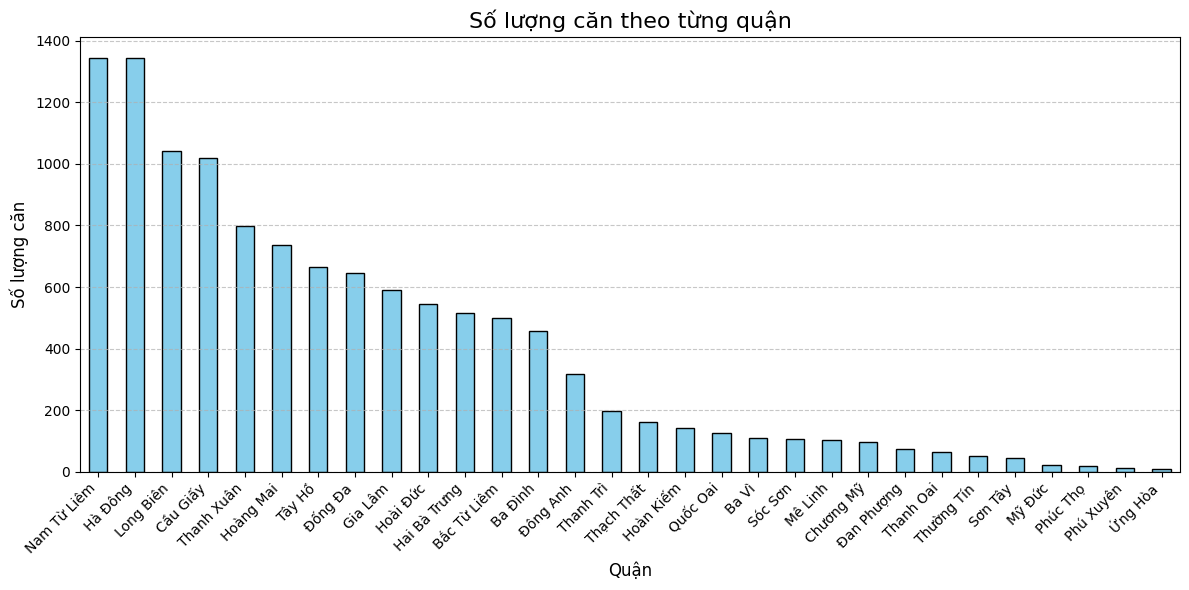

In [50]:
# Đếm số lượng căn theo từng quận
district_counts = data['District'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(12, 6))
district_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Số lượng căn theo từng quận', fontsize=16)
plt.xlabel('Quận', fontsize=12)
plt.ylabel('Số lượng căn', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show() 

##### Nhận xét: 
    - Nam Từ Liêm, Hà Đông, và Long Biên là các quận dẫn đầu với số lượng căn cao nhất, mỗi quận vượt hơn 1000 căn.
    - Điều này cho thấy các quận này có tốc độ phát triển đô thị mạnh mẽ, có thể là khu vực tập trung nhiều dự án bất động sản.
    - Các quận như Cầu Giấy, Thanh Xuân, Hoàng Mai, Tây Hồ, và Đống Đa có số lượng căn nằm ở mức trung bình (từ 500 đến 1000 căn). Đây là những quận có quy hoạch lâu đời hoặc phát triển vừa phải so với nhóm quận dẫn đầu.
    - Hoàn Kiếm, Sơn Tây, Chương Mỹ, Đan Phượng, và các quận khác thuộc nhóm cuối có số lượng căn rất ít.
    - Nguyên nhân có thể do diện tích quận nhỏ (như Hoàn Kiếm) hoặc mức độ phát triển đô thị chưa cao (như các quận ngoại thành như Chương Mỹ).
    - Biểu đồ thể hiện sự phân bổ không đồng đều về số lượng căn theo từng quận, với sự tập trung lớn ở một số quận trung tâm hoặc quận mới phát triển mạnh.
    - Điều này phản ánh sự bất đối xứng trong phát triển đô thị giữa các khu vực nội thành và ngoại thành Hà Nội.

##### Biểu đồ giá trung bình theo từng quận

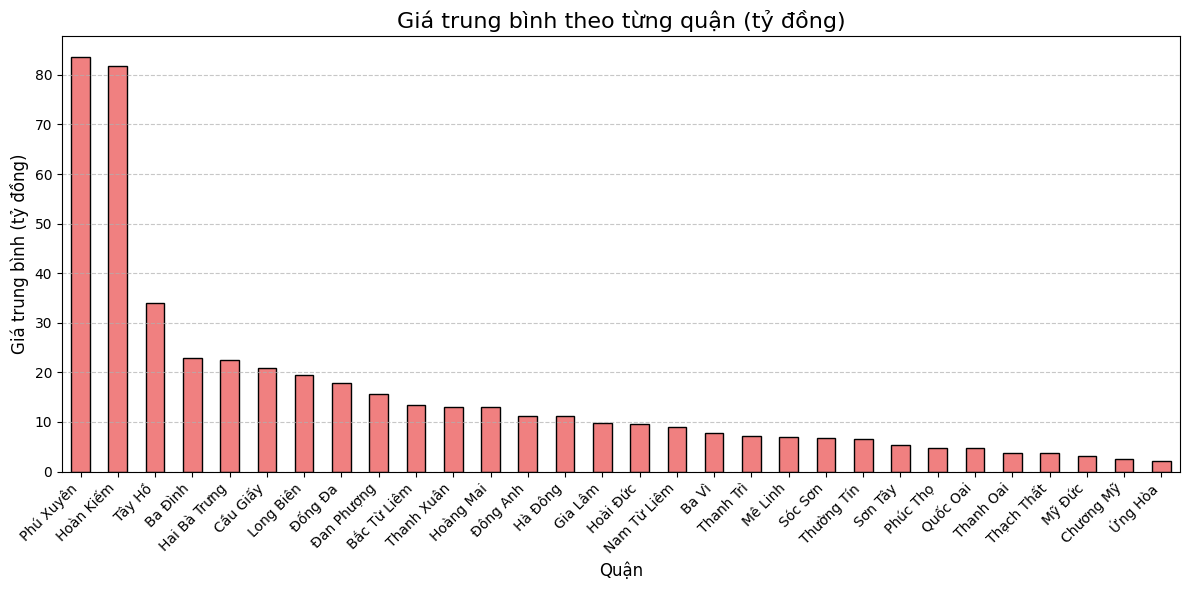

In [51]:
# Tính giá trung bình theo từng quận
average_price_per_district = data.groupby('District')['Total Price (tỷ)'].mean()

# Tạo biểu đồ cột
plt.figure(figsize=(12, 6))
average_price_per_district.sort_values(ascending=False).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Giá trung bình theo từng quận (tỷ đồng)', fontsize=16)
plt.xlabel('Quận', fontsize=12)
plt.ylabel('Giá trung bình (tỷ đồng)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show() 

##### Nhận xét: 
    + Phú Xuyên và Hoàn Kiếm dẫn đầu với giá trung bình cao vượt trội, trên 80 tỷ đồng.
    + Điều này có thể phản ánh các giao dịch bất động sản giá trị cao tại các khu vực này, đặc biệt là Hoàn Kiếm – trung tâm của Hà Nội với bất động sản giá trị lịch sử và thương mại.
 
    + Các quận như Tây Hồ, Ba Đình, Hai Bà Trưng, và Cầu Giấy có mức giá trung bình trong khoảng từ 20 tỷ đến 40 tỷ đồng.
    + Đây là các khu vực có giá trị đất cao nhờ vị trí đắc địa và hạ tầng phát triển, thu hút nhiều nhà đầu tư bất động sản.

    + Các quận như Thạch Thất, Mỹ Đức, Chương Mỹ, và các quận ngoại thành khác có mức giá trung bình dưới 5 tỷ đồng.
    + Điều này phản ánh sự chênh lệch giữa giá trị bất động sản ở khu vực trung tâm so với vùng ven và ngoại thành.

    + Biểu đồ cho thấy sự chênh lệch rất lớn giữa các quận trung tâm (Hoàn Kiếm, Tây Hồ) và các quận ngoại thành.
    + Các quận trung tâm tập trung các bất động sản cao cấp, trong khi ngoại thành có xu hướng giao dịch các bất động sản giá thấp hơn.

##### Biểu đồ giá trung bình trên mỗi m2 theo quận 

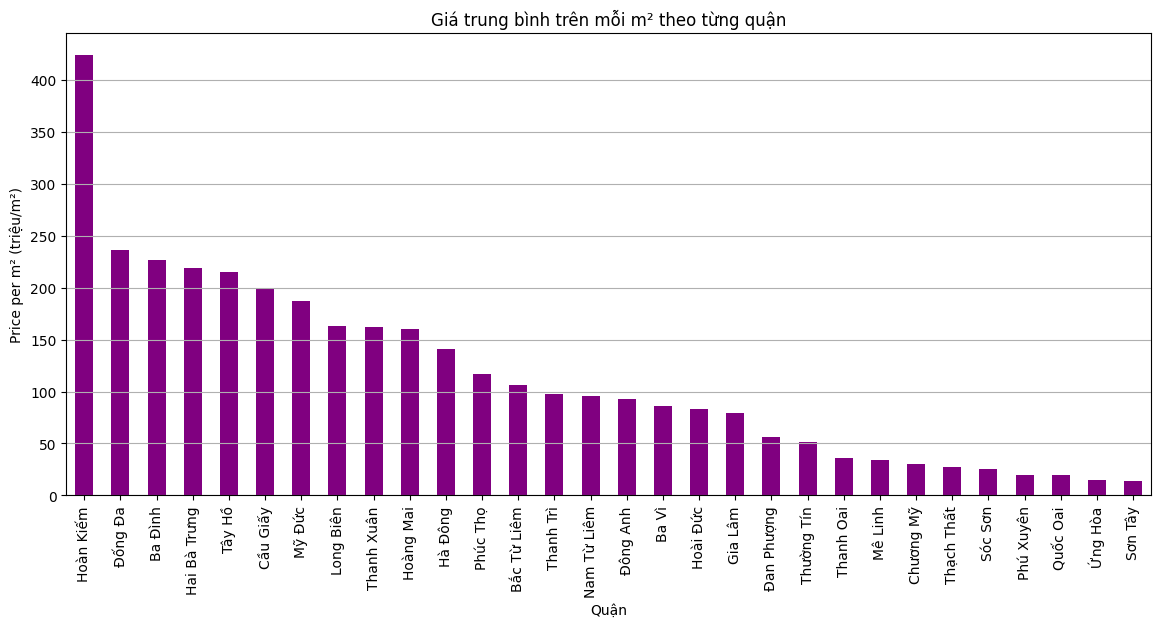

In [52]:
district_price_avg = data.groupby('District')['Price per m² (triệu/m²)'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
district_price_avg.plot(kind='bar', color='purple')
plt.title('Giá trung bình trên mỗi m² theo từng quận')
plt.xlabel('Quận')
plt.ylabel('Price per m² (triệu/m²)')
plt.grid(axis='y')
plt.show()


##### Nhận xét:
    - An Dương và Hoàn Kiếm dẫn đầu với giá trung bình trên mỗi m² cao nhất, vượt mốc 400 triệu đồng/m². Điều này cho thấy đây là khu vực có giá trị bất động sản cao cấp hoặc nằm tại các vị trí trung tâm, đắc địa.
    - Các quận trung tâm khác như Đống Đa, Ba Đình, Hai Bà Trưng, và Tây Hồ cũng có giá trung bình cao, dao động từ 200 - 300 triệu đồng/m². Những quận này thường là khu vực dân cư sầm uất hoặc có hạ tầng phát triển tốt.

    - Các quận như Thạch Thất, Sơn Tây, Phú Xuyên, và Ứng Hòa có giá trung bình trên mỗi m² thấp nhất, dưới 50 triệu đồng/m². Điều này có thể liên quan đến vị trí xa trung tâm và hạ tầng chưa phát triển mạnh.

    - Biểu đồ thể hiện rõ sự chênh lệch giá trị bất động sản giữa khu vực trung tâm (như Hoàn Kiếm, Ba Đình) và các vùng ngoại thành.
    - Các quận có sự phát triển nhanh về hạ tầng hoặc gần trung tâm (như Cầu Giấy, Long Biên, Thanh Xuân) có giá trị ở mức trung bình khá, từ 100 - 200 triệu đồng/m².

#### Biểu đồ phân phối diện tích 

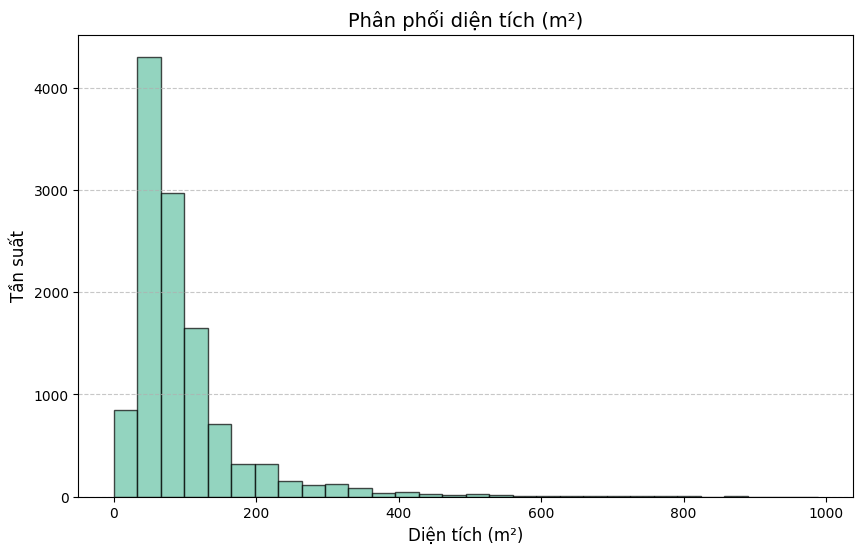

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(data['Area (m²)'], bins=30, color='#66c2a5', edgecolor='black', alpha=0.7)
plt.title('Phân phối diện tích (m²)', fontsize=14)
plt.xlabel('Diện tích (m²)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###### Nhận xét: 
    - Phần lớn các căn nhà/tin rao bán có diện tích dưới 100 m², tập trung chủ yếu trong khoảng từ 0 đến 50 m². Đây có thể là các căn hộ nhỏ hoặc nhà ở diện tích hẹp.
    - Biểu đồ có dạng lệch phải, tức là phần lớn dữ liệu nằm ở mức diện tích nhỏ, trong khi một số ít tin rao bán có diện tích rất lớn, vượt trên 400 m², nhưng số lượng này không đáng kể.
    - Có những căn/tin rao bán diện tích lớn hơn 600 m², nhưng tần suất cực kỳ thấp. Điều này cho thấy thị trường chủ yếu tập trung vào các bất động sản diện tích trung bình hoặc nhỏ.

#### Biểu đồ phân bố số lượng phòng ngủ và phòng tắm

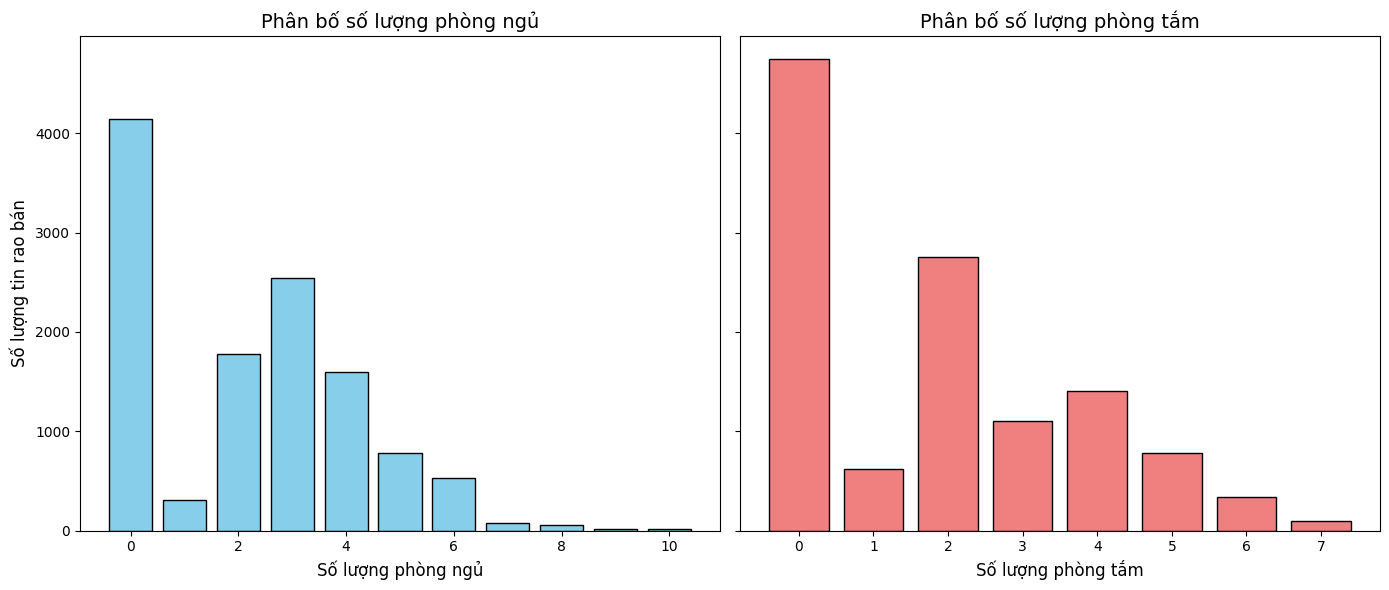

In [58]:
# chuẩn bị dữ liệu cho "Bedroom Number" và "Bathroom Number"
bedroom_counts = data["Bedroom Number"].value_counts().sort_index()
bathroom_counts = data["Bathroom Number"].value_counts().sort_index()

# Vẽ biểu đồ thanh
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Biểu đồ thanh số phòng ngủ
axes[0].bar(bedroom_counts.index, bedroom_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title("Phân bố số lượng phòng ngủ", fontsize=14)
axes[0].set_xlabel("Số lượng phòng ngủ", fontsize=12)
axes[0].set_ylabel("Số lượng tin rao bán", fontsize=12)

# Biểu đồ thanh số phòng tắm
axes[1].bar(bathroom_counts.index, bathroom_counts.values, color='lightcoral', edgecolor='black')
axes[1].set_title("Phân bố số lượng phòng tắm", fontsize=14)
axes[1].set_xlabel("Số lượng phòng tắm", fontsize=12)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()


##### Nhận xét:
1. Phân bố số lượng phòng ngủ:
 - Tập trung chính ở số lượng nhỏ
 - Số lượng tin rao bán có 2 phòng ngủ chiếm đa số, tiếp theo là 3 phòng ngủ.
 - Rất ít tin rao có số lượng phòng ngủ từ 6 trở lên.
 - Ít tin rao với số lượng phòng ngủ lớn
 - Các căn nhà/tin rao có từ 8-10 phòng ngủ gần như không phổ biến, có thể là bất động sản đặc thù (biệt thự hoặc nhà lớn).
2. Phân bố số lượng phòng tắm:
 - Phòng tắm ít hơn phòng ngủ:
 - Phổ biến nhất là các bất động sản có 1 hoặc 2 phòng tắm.
 - Số lượng phòng tắm lớn hơn (5-7 phòng) rất hiếm gặp, thể hiện sự tương đồng với xu hướng phòng ngủ.

 - Các căn có số lượng phòng ngủ hoặc phòng tắm lớn có thể đại diện cho các phân khúc nhà cao cấp hoặc biệt thự.
 - Trong khi đó, các căn có ít phòng ngủ/phòng tắm phù hợp với các phân khúc nhà ở phổ thông.

#### Số lượng tin rao bán theo từng tháng (cột "Date").

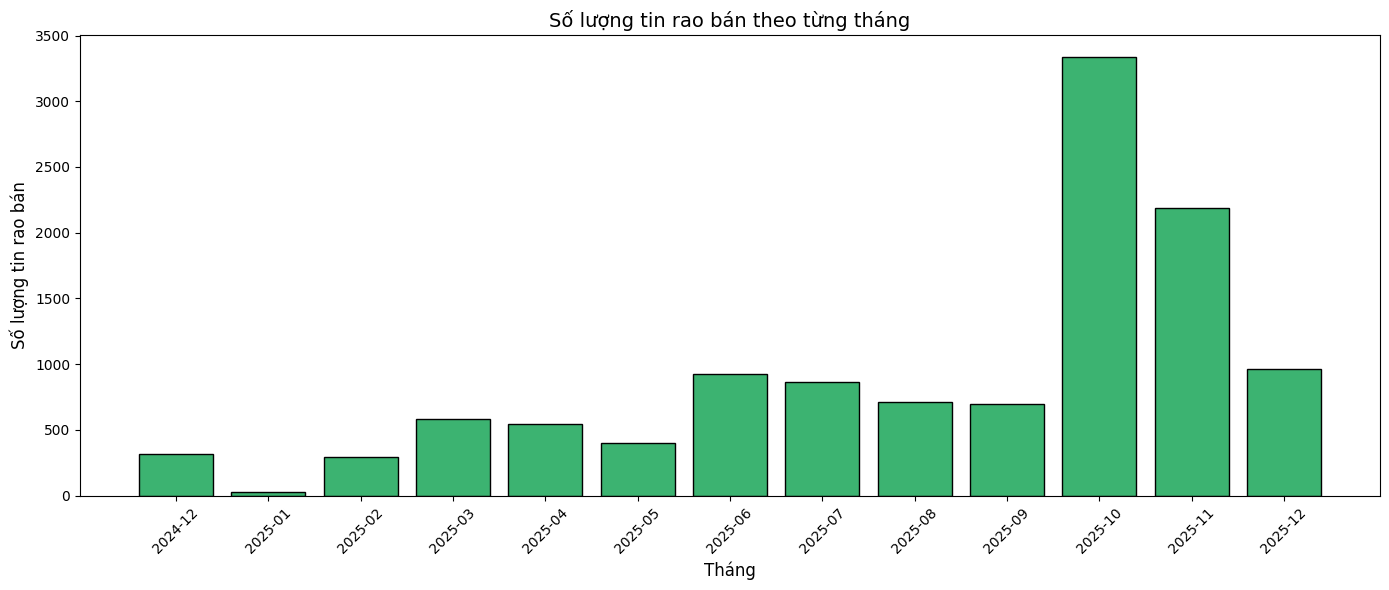

In [63]:
# Đảm bảo cột "Ngày" ở định dạng ngày giờ để phân tích
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Trích xuất tháng và năm để nhóm
data["Month_Year"] = data["Date"].dt.to_period("M")

# Đếm số lượng danh sách mỗi tháng
monthly_counts = data["Month_Year"].value_counts().sort_index()

# Vẽ biểu đồ thanh
plt.figure(figsize=(14, 6))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values, color='mediumseagreen', edgecolor='black')
plt.title("Số lượng tin rao bán theo từng tháng", fontsize=14)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Số lượng tin rao bán", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


##### Nhận xét:

    - Có sự gia tăng đáng kể về số lượng tin rao bán vào các tháng cuối năm 2025, đặc biệt là tháng 10, khi đạt đỉnh cao nhất.
    - Trong các tháng đầu năm 2025 (như tháng 1 và 2), số lượng tin rao bán rất thấp, sau đó tăng dần từ tháng 3.

    - Các tháng 10 và 11 năm 2025 có số lượng tin rao bán cao nhất. Đây có thể là thời gian cao điểm của thị trường bất động sản.

    - Tháng 1 năm 2025 là tháng có số lượng tin rao bán thấp nhất, có thể do đây là thời gian trùng với kỳ nghỉ Tết hoặc do các yếu tố mùa vụ khác.

#### Xu hướng giá cả theo thời gian (ví dụ ở Nam Từ Liêm do đây là quận có nhiêu dự án được rao bán nhất):

C:\Users\Asus\anaconda3\envs\KVC\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


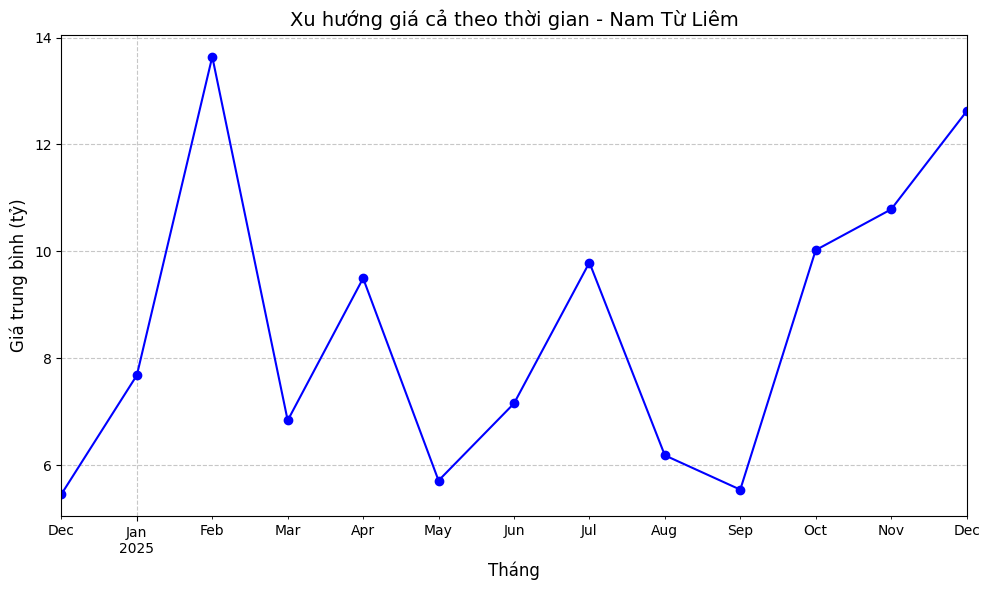

In [59]:
# Lọc dữ liệu của quận Nam Từ Liêm
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')  # Đảm bảo định dạng ngày tháng đúng
nam_tu_liem_data = data[data['District'] == 'Nam Từ Liêm']

# Tính trung bình giá theo tháng
nam_tu_liem_data['YearMonth'] = nam_tu_liem_data['Date'].dt.to_period('M')
price_trend = nam_tu_liem_data.groupby('YearMonth')['Total Price (tỷ)'].mean()

# Vẽ biểu đồ xu hướng giá cả
plt.figure(figsize=(10, 6))
price_trend.plot(marker='o', color='b')
plt.title('Xu hướng giá cả theo thời gian - Nam Từ Liêm', fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Giá trung bình (tỷ)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Nhận xét: 
    - Giá trung bình có sự biến động đáng kể qua các tháng.
    - Tháng 2 đạt đỉnh cao nhất với giá trung bình xấp xỉ 14 tỷ đồng.
    - Sau tháng 2, giá giảm mạnh vào tháng 3 và tháng 5 xuống dưới 6 tỷ đồng.
    - Từ tháng 9, giá trung bình tăng mạnh trở lại, đặc biệt từ tháng 10 đến tháng 12.

    - Biểu đồ cho thấy khả năng giá cả chịu ảnh hưởng bởi mùa vụ hoặc các yếu tố đặc biệt trong từng thời kỳ.
    - Giai đoạn cuối năm (tháng 10 đến tháng 12) giá tăng ổn định, có thể liên quan đến nhu cầu mua bán nhà đất cao hơn.

#### Biểu đồ so sánh bất động sản theo từng quận



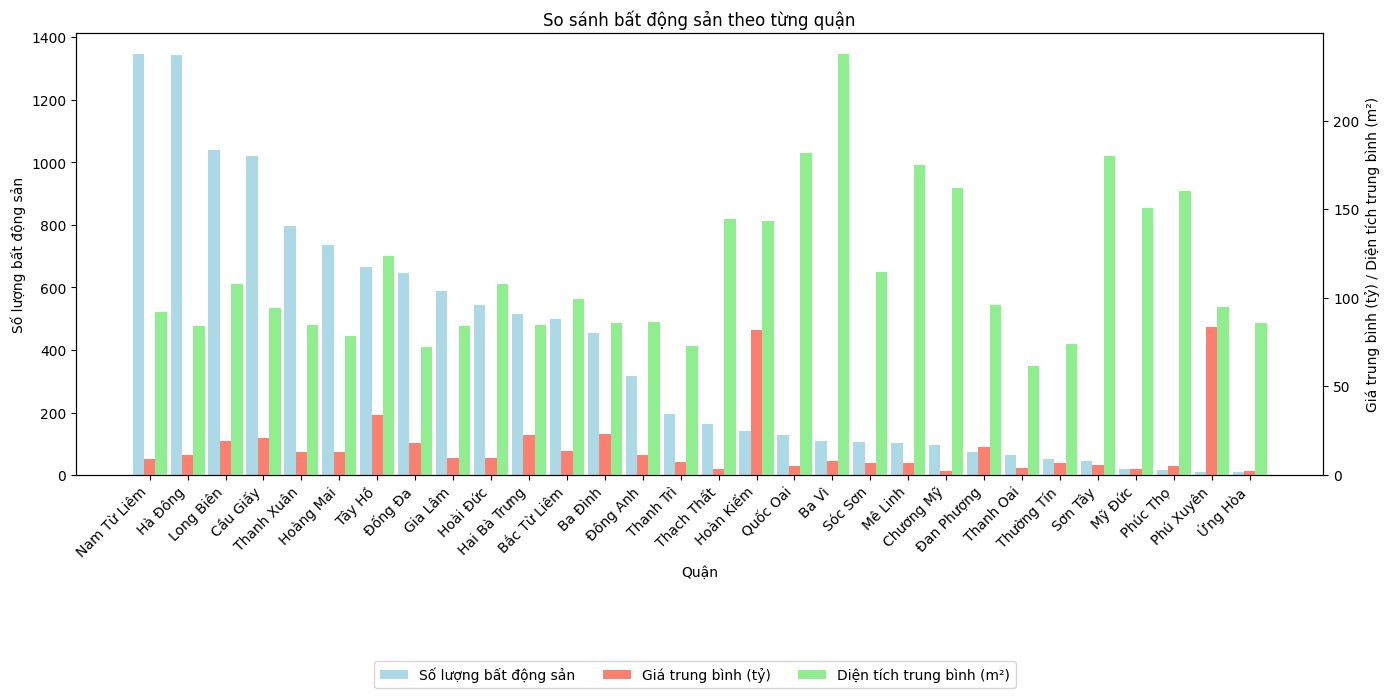

In [60]:
# Sửa lại để sử dụng đúng tên cột
district_summary = data.groupby('District').agg({
    'Total Price (tỷ)': 'mean',    # Giá trung bình
    'Area (m²)': 'mean',          # Diện tích trung bình
    'District': 'size'            # Số lượng bất động sản
}).rename(columns={'District': 'count'}).reset_index()

# Sắp xếp dữ liệu theo số lượng bất động sản
district_summary = district_summary.sort_values(by='count', ascending=False)

# Dữ liệu để vẽ
districts = district_summary['District']
counts = district_summary['count']
avg_prices = district_summary['Total Price (tỷ)']
avg_areas = district_summary['Area (m²)']

# Tạo biểu đồ cột nhóm
x = np.arange(len(districts))
width = 0.3

fig, ax1 = plt.subplots(figsize=(14, 6))

# Số lượng bất động sản
ax1.bar(x - width, counts, width, label='Số lượng bất động sản', color='lightblue')

# Giá trung bình
ax2 = ax1.twinx()
ax2.bar(x, avg_prices, width, label='Giá trung bình (tỷ)', color='salmon')

# Diện tích trung bình
ax2.bar(x + width, avg_areas, width, label='Diện tích trung bình (m²)', color='lightgreen')

# Nhãn và tiêu đề
ax1.set_xlabel('Quận')
ax1.set_ylabel('Số lượng bất động sản')
ax2.set_ylabel('Giá trung bình (tỷ) / Diện tích trung bình (m²)')
ax1.set_title('So sánh bất động sản theo từng quận')
ax1.set_xticks(x)
ax1.set_xticklabels(districts, rotation=45, ha='right')

# Chú thích
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
fig.tight_layout()
plt.show()


##### Nhận xét:
    - Quận Nam Từ Liêm và Hà Đông có số lượng bất động sản lớn nhất, thể hiện qua chiều cao vượt trội của cột xanh nhạt.
    - Giá trung bình tại các quận nội thành như Ba Đình, Tây Hồ, và Hoàn Kiếm cao hơn so với các quận ngoại thành, mặc dù số lượng bất động sản ít hơn.
    - Diện tích trung bình tại các quận ngoại thành (như Ba Vì, Sóc Sơn, Quốc Oai) thường lớn hơn so với các quận nội thành. Điều này phản ánh đặc điểm phân bố bất động sản ở vùng nội và ngoại thành.